In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/reviews.csv")

In [3]:
df.head()

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


In [4]:
df["rating"].value_counts()

,count
rating,
5,460
4,316
3,172
1,80
2,72


In [5]:
import warnings
warnings.filterwarnings('ignore')

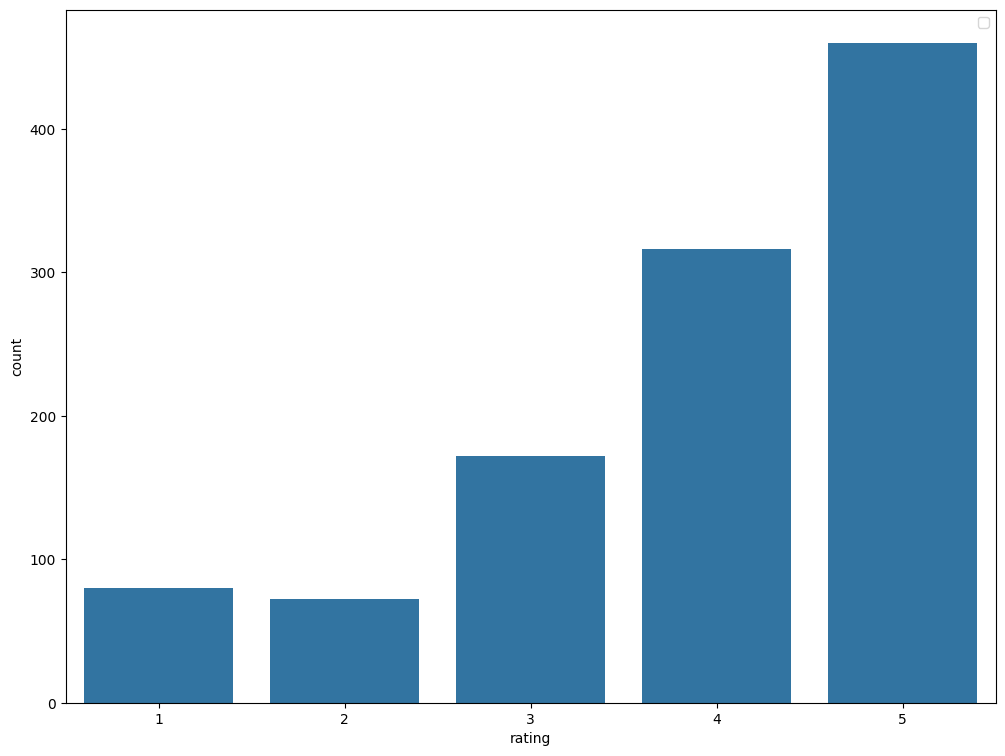

In [6]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating" , data= df)
plt.legend()

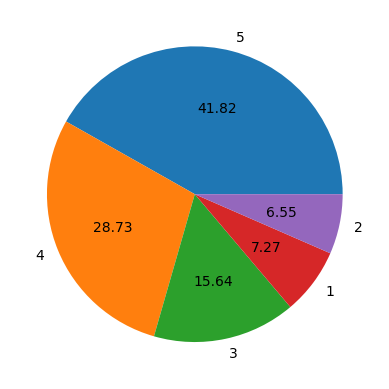

In [7]:
plt.pie(df['rating'].value_counts(), labels=[5,4,3,1,2] , autopct ='%0.2f')
plt.show()

In [8]:
import nltk

In [9]:
df['text'].apply(len)

,text
0,680
1,914
2,173
3,63
4,161
...,...
1095,159
1096,66
1097,28
1098,112


In [10]:
df['num_chr'] = df['text'].apply(len)

In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[We, went, to, Marmaris, with, my, wife, for, ..."
1,"[During, my, holiday, in, Marmaris, we, ate, h..."
2,"[Prices, are, very, affordable, ., The, menu, ..."
3,"[Turkey, 's, cheapest, artisan, restaurant, an..."
4,"[I, do, n't, know, what, you, will, look, for,..."
...,...
1095,"[There, are, so, many, types, of, pizza, ;, yo..."
1096,"[I, tried, the, smoked, ribeye, pizza, ;, the,..."
1097,"[Crowded, and, expensive, place, .]"
1098,"[No, bad, ., It, was, very, crowded, ;, there,..."


In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,business_name,author_name,text,photo,rating,rating_category,num_chr,num_words
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,680,146
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,914,200
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,173,37
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,63,11
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,161,35


In [22]:
df[['num_words','num_chr']].describe()

,num_words,num_chr
count,1100.000000,1100.000000
mean,23.576364,110.835455
std,14.735971,69.153870
min,1.000000,5.000000
25%,14.000000,62.000000
50%,22.000000,104.000000
75%,31.000000,147.000000
max,200.000000,914.000000


<Axes: xlabel='num_chr', ylabel='Count'>

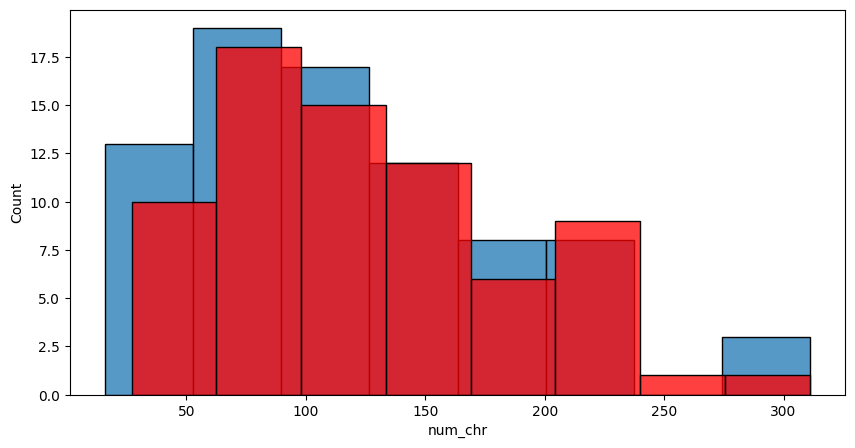

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['rating']==1]['num_chr'])
sns.histplot(df[df['rating']==2]['num_chr'] , color= 'r')

<Axes: xlabel='num_chr', ylabel='Count'>

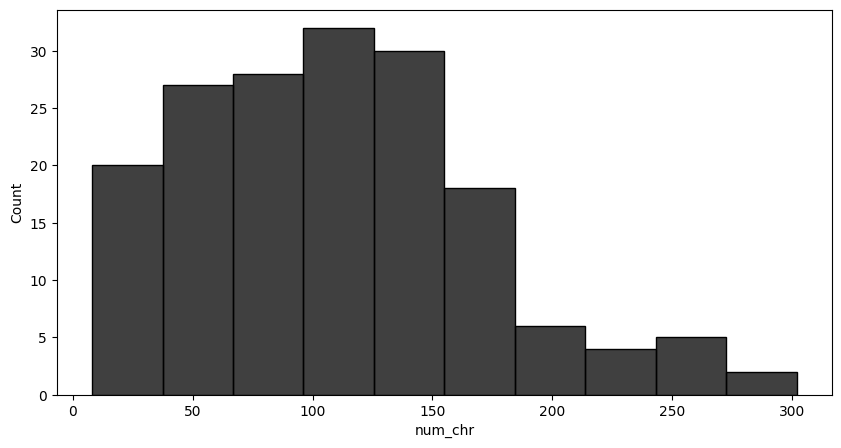

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['rating']==3]['num_chr'] , color= 'black')

<Axes: xlabel='num_chr', ylabel='Count'>

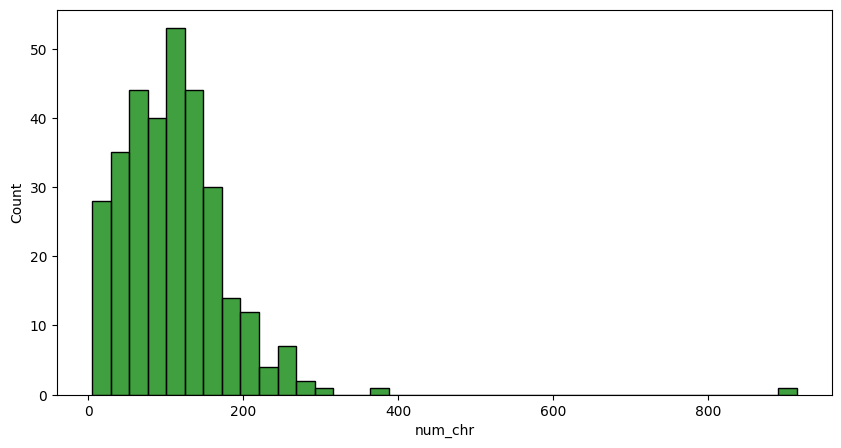

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['rating']==4]['num_chr'] , color= 'g')

<Axes: xlabel='num_chr', ylabel='Count'>

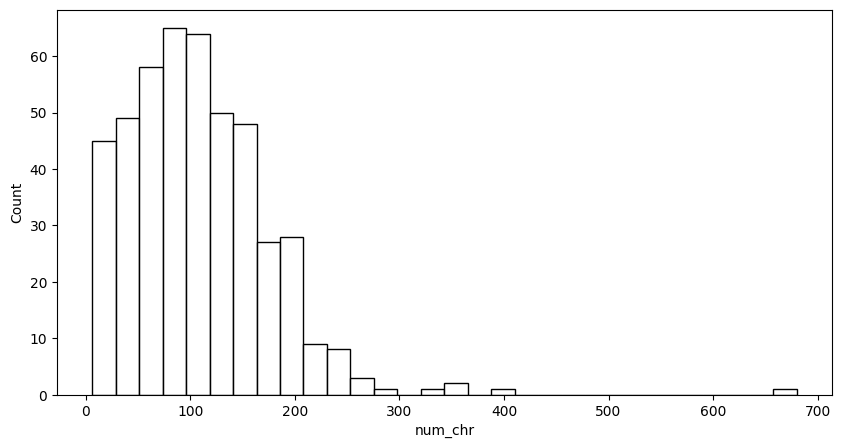

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['rating']==5]['num_chr'] , color= 'w')

In [65]:
from sklearn.model_selection import train_test_split

x = df['text']
y= df['rating']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=45)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()
x_train_tfidf = vc.fit_transform(x_train)

In [57]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [58]:
text_clf = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf' , LinearSVC())])
text_clf.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [60]:
def model(model):

  y_pred1 = model.predict(x_test)
  print("accuracy_score :",accuracy_score(y_test , y_pred1))
  print("confusion_matrix :",confusion_matrix(y_test , y_pred1))
  print(classification_report(y_test, y_pred1))

In [66]:
model(text_clf)

accuracy_score : 0.7823691460055097
confusion_matrix : [[ 12   0   3   5   4]
 [  0  11   3   2   2]
 [  0   1  44   7   4]
 [  1   0   7  77  21]
 [  0   1   3  15 140]]
              precision    recall  f1-score   support

           1       0.92      0.50      0.65        24
           2       0.85      0.61      0.71        18
           3       0.73      0.79      0.76        56
           4       0.73      0.73      0.73       106
           5       0.82      0.88      0.85       159

    accuracy                           0.78       363
   macro avg       0.81      0.70      0.74       363
weighted avg       0.79      0.78      0.78       363

